In [49]:
import tensorflow as tf
import keras as k
import numpy as np
import cv2

In [50]:
fashion_mnist= k.datasets.fashion_mnist
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [51]:
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Conv2D(64,(3,3),activation='relu'))
model.add(tf.keras.layers.MaxPooling2D(2,2))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

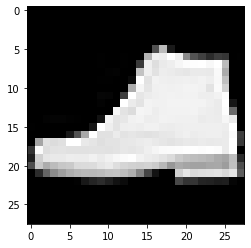

In [52]:
import matplotlib.pyplot as plt
plt.imshow(train_images[42],cmap='gray')

In [53]:
train_images=train_images.reshape(60000,28,28,1)
test_images=test_images.reshape(10000,28,28,1)
train_images=tf.keras.utils.normalize(train_images,axis=1) #Noramilizing data
test_images=tf.keras.utils.normalize(test_images,axis=1)

In [54]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
60000/60000 [==============================] - 25s 411us/sample - loss: 0.4676 - acc: 0.8268
Epoch 2/5
60000/60000 [==============================] - 24s 398us/sample - loss: 0.3177 - acc: 0.8823
Epoch 3/5
60000/60000 [==============================] - 24s 403us/sample - loss: 0.2733 - acc: 0.8984
Epoch 4/5
60000/60000 [==============================] - 24s 406us/sample - loss: 0.2407 - acc: 0.9092
Epoch 5/5
60000/60000 [==============================] - 25s 408us/sample - loss: 0.2163 - acc: 0.9177


In [55]:
model.evaluate(test_images,test_labels)

10000/10000 [==============================] - 1s 112us/sample - loss: 0.2825 - acc: 0.8953


[0.28251821537017824, 0.8953]

In [56]:
predictions=model.predict(test_images)

test=test_images.reshape(10000,28,28) #reshaping back to preveous size

Predicted object number is 0
Sample Label is 0


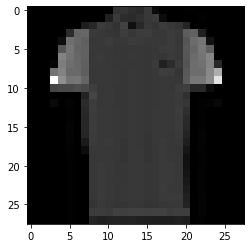

In [63]:
sample_number=85
#Object_number     Object_type
#0 	                T-shirt/top
#1 	                Trouser
#2 	                Pullover
#3 	                Dress
#4 	                Coat
#5 	                Sandal
#6 	                Shirt
#7               	Sneaker
#8 	                Bag
#9 	                Ankle boot
print('Predicted object number is',np.argmax(predictions[sample_number]))
plt.imshow(test[sample_number],cmap='gray')
print('Sample Label is',test_labels[sample_number])